# Mini-Project 3 - Part 1. Gathering and Pre-Processing the Data

## Objective:

### Predict Investor Sentiment Based on News Articles

Given the business and finance news articles related to the stock market and S&P 500, predict the likely investor sentiment from three possible choices:
\n
- Positive (Investors likely to BUY)
- Neutral (Investors likely to take NO ACTION)
- Negative (Investors likely to SELL)

### Summary of the Dataset: Business/Finance News Articles From the New York Times API from the Year 1990 to 2009

Dataset Information:


The dataset represents 20 years (1990-2009) of business news articles from the New York Times obtained through their API. It has been filtered down to only include news that are related to the stock market in general or S&P 500 index specifically.

The sentiment labels have been manually placed using custom scoring system that incorporates a number of lexicon dictionaries, and sentiment analysis algorithms (specifically, TextBlob and Vader). Any news articles with a score of more than 0.1 has been labelled "positive (1)", and any news articles with a score of less than -0.1 has been labelled "negative (-1)". Any news articles in between 0.1 and -0.1 have been labelled "neutral (0)".

## 1. Pre-Process the Data - Part 1. Gathering Data

### 1.1 Import All Required Libraries

In [1]:
## Pandas and Numpy
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np

## API
import requests
import json

## Regex & Miscellaneous
import re as re
import time as timer
from datetime import datetime, date, time
from tqdm import tqdm
from collections import Counter
import pickle

## Sentiment Analysis
import spacy
import nltk
from spacy.lang.en.stop_words import STOP_WORDS
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

## Machine Learning Algorithms
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, auc, classification_report, recall_score, precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import label_binarize
from imblearn.over_sampling import SMOTE

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

## Data Visualisation Modules
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.colors import BoundaryNorm, ListedColormap




In [2]:
# %time !python -m spacy download en_core_web_md
## download english language model

### 1.2. Helper Functions for Extracting Data

In [3]:
def create_dict(temp_dict, key, value):
    if key in temp_dict.keys():
        temp_dict[key].append(value)
    else: 
        temp_dict[key] = []
        temp_dict[key].append(value)
    return temp_dict

In [4]:
## User-Defined Function for Extracting Publication Dates and Abstract from the JSON Data.

def extract_data(r):
    r_dict = {}
    temp_json = r.json()
    doc = temp_json["response"]["docs"]
    length = list(range(len(temp_json["response"]["docs"])))
    
    for i in tqdm (length, 
                   desc="Loading…"):

        news_desk = doc[i]['news_desk']
        lookup = r"[bB]usiness|[fF]inan|[nN]one|[mM]oney"
        match = re.search(lookup, news_desk)
        
        if match:
            date = doc[i]["pub_date"]
            date = date[:10]
            abstract = doc[i]["abstract"]
            lead_paragraph = doc[i]['lead_paragraph']
            
            if len(abstract) < 700:
                value = abstract
            else:
                value = lead_paragraph
            
            r_dict = create_dict(r_dict, date, value)
            
        else:
            continue
    
    return r_dict

In [5]:
### User-Defined Function for Filtering the Data Based on Keywords
keywords = ["Standard & Poor", "S&P 500", "stock market", "index", ".INX", "Wall Street"]

def filter_keywords(r_dict, keywords):
    f_dict = {}
    
    for date, abstract in r_dict.items():
        
        for i in range(len(abstract)):
            
            for keyword in keywords:
                
                if (keyword in abstract[i]) and ("COMPANY REPORT" not in abstract[i]):                    
                    
                    f_dict = create_dict(f_dict, date, abstract[i])
                    
                else:
                    continue
    
    return f_dict
    

In [6]:
### User-Defined Function for Gathering Data from API

def get_data(start_year, end_year):
    
    data_dict = {}
    
    years = range(start_year, end_year+1)
    months = range(1, 13)
    
    for year in tqdm(years, desc="Loading…"):
        
        for month in months:
            date = f"{year}-{month}"
            print(f"Gathering Data for Year: {year}, Month: {month}")
                
            url = f"https://api.nytimes.com/svc/archive/v1/{year}/{month}.json?api-key={key}"
            r = requests.get(url)
            r_dict = extract_data(r)
            f_dict = filter_keywords(r_dict, keywords)
            
            data_dict = create_dict(data_dict, date, f_dict)
        
            timer.sleep(5) # Sleep for 5 seconds
    
    return data_dict
    

### 1.3. API Calls & Gather Data From New York Times

In [65]:
key = "3aD0nGomAVgo2sv2dJiKPNG0iEHoR4AL "

In [8]:
dict_9099 = get_data(1990, 1999)

Loading…:   0%|                                          | 0/10 [00:00<?, ?it/s]

Gathering Data for Year: 1990, Month: 1



Loading…: 100%|█████████████████████████| 8879/8879 [00:00<00:00, 601159.42it/s]


Gathering Data for Year: 1990, Month: 2



Loading…: 100%|█████████████████████████| 8468/8468 [00:00<00:00, 655967.61it/s]


Gathering Data for Year: 1990, Month: 3



Loading…: 100%|█████████████████████████| 8856/8856 [00:00<00:00, 660750.61it/s]


Gathering Data for Year: 1990, Month: 4



Loading…: 100%|█████████████████████████| 9694/9694 [00:00<00:00, 629152.09it/s]


Gathering Data for Year: 1990, Month: 5



Loading…: 100%|█████████████████████████| 8963/8963 [00:00<00:00, 659050.29it/s]


Gathering Data for Year: 1990, Month: 6



Loading…: 100%|█████████████████████████| 7071/7071 [00:00<00:00, 664127.09it/s]


Gathering Data for Year: 1990, Month: 7



Loading…: 100%|█████████████████████████| 8219/8219 [00:00<00:00, 661529.90it/s]


Gathering Data for Year: 1990, Month: 8



Loading…: 100%|█████████████████████████| 7987/7987 [00:00<00:00, 671340.80it/s]


Gathering Data for Year: 1990, Month: 9



Loading…: 100%|█████████████████████████| 7405/7405 [00:00<00:00, 661811.66it/s]


Gathering Data for Year: 1990, Month: 10



Loading…: 100%|█████████████████████████| 8687/8687 [00:00<00:00, 651444.08it/s]


Gathering Data for Year: 1990, Month: 11



Loading…: 100%|█████████████████████████| 7782/7782 [00:00<00:00, 612131.46it/s]


Gathering Data for Year: 1990, Month: 12



Loading…:  10%|███▎                             | 1/10 [02:09<19:26, 129.60s/it]

Gathering Data for Year: 1991, Month: 1



Loading…: 100%|█████████████████████████| 6866/6866 [00:00<00:00, 624755.21it/s]


Gathering Data for Year: 1991, Month: 2



Loading…: 100%|█████████████████████████| 7323/7323 [00:00<00:00, 533281.62it/s]


Gathering Data for Year: 1991, Month: 3



Loading…: 100%|█████████████████████████| 7312/7312 [00:00<00:00, 613325.95it/s]


Gathering Data for Year: 1991, Month: 4



Loading…: 100%|█████████████████████████| 8005/8005 [00:00<00:00, 584346.89it/s]


Gathering Data for Year: 1991, Month: 5



Loading…: 100%|█████████████████████████| 7274/7274 [00:00<00:00, 656256.56it/s]


Gathering Data for Year: 1991, Month: 6



Loading…: 100%|█████████████████████████| 7439/7439 [00:00<00:00, 645698.18it/s]


Gathering Data for Year: 1991, Month: 7



Loading…: 100%|█████████████████████████| 7506/7506 [00:00<00:00, 654126.32it/s]


Gathering Data for Year: 1991, Month: 8



Loading…: 100%|█████████████████████████| 6297/6297 [00:00<00:00, 647500.18it/s]


Gathering Data for Year: 1991, Month: 9



Loading…: 100%|█████████████████████████| 7213/7213 [00:00<00:00, 628735.91it/s]


Gathering Data for Year: 1991, Month: 10



Loading…: 100%|█████████████████████████| 6536/6536 [00:00<00:00, 630119.32it/s]


Gathering Data for Year: 1991, Month: 11



Loading…: 100%|█████████████████████████| 6739/6739 [00:00<00:00, 646983.49it/s]


Gathering Data for Year: 1991, Month: 12



Loading…:  20%|██████▌                          | 2/10 [04:28<17:58, 134.83s/it]

Gathering Data for Year: 1992, Month: 1



Loading…: 100%|█████████████████████████| 7618/7618 [00:00<00:00, 588763.73it/s]


Gathering Data for Year: 1992, Month: 2



Loading…: 100%|█████████████████████████| 6032/6032 [00:00<00:00, 605191.76it/s]


Gathering Data for Year: 1992, Month: 3



Loading…: 100%|█████████████████████████| 7753/7753 [00:00<00:00, 634456.61it/s]


Gathering Data for Year: 1992, Month: 4



Loading…: 100%|█████████████████████████| 7182/7182 [00:00<00:00, 645581.78it/s]


Gathering Data for Year: 1992, Month: 5



Loading…: 100%|█████████████████████████| 8082/8082 [00:00<00:00, 648896.73it/s]


Gathering Data for Year: 1992, Month: 6



Loading…: 100%|█████████████████████████| 7123/7123 [00:00<00:00, 643796.65it/s]


Gathering Data for Year: 1992, Month: 7



Loading…: 100%|█████████████████████████| 7235/7235 [00:00<00:00, 653849.08it/s]


Gathering Data for Year: 1992, Month: 8



Loading…: 100%|█████████████████████████| 7341/7341 [00:00<00:00, 634473.94it/s]


Gathering Data for Year: 1992, Month: 9



Loading…: 100%|█████████████████████████| 6529/6529 [00:00<00:00, 570572.16it/s]


Gathering Data for Year: 1992, Month: 10



Loading…: 100%|█████████████████████████| 7289/7289 [00:00<00:00, 582462.31it/s]


Gathering Data for Year: 1992, Month: 11



Loading…: 100%|█████████████████████████| 7240/7240 [00:00<00:00, 612405.94it/s]


Gathering Data for Year: 1992, Month: 12



Loading…:  30%|█████████▉                       | 3/10 [06:38<15:29, 132.74s/it]

Gathering Data for Year: 1993, Month: 1



Loading…: 100%|█████████████████████████| 7340/7340 [00:00<00:00, 654955.67it/s]


Gathering Data for Year: 1993, Month: 2



Loading…: 100%|█████████████████████████| 6575/6575 [00:00<00:00, 644214.84it/s]


Gathering Data for Year: 1993, Month: 3



Loading…: 100%|█████████████████████████| 6062/6062 [00:00<00:00, 572255.20it/s]


Gathering Data for Year: 1993, Month: 4



Loading…: 100%|█████████████████████████| 6748/6748 [00:00<00:00, 642421.49it/s]


Gathering Data for Year: 1993, Month: 5



Loading…: 100%|█████████████████████████| 7153/7153 [00:00<00:00, 627234.00it/s]


Gathering Data for Year: 1993, Month: 6



Loading…: 100%|█████████████████████████| 6530/6530 [00:00<00:00, 653016.19it/s]


Gathering Data for Year: 1993, Month: 7



Loading…: 100%|█████████████████████████| 6805/6805 [00:00<00:00, 640765.06it/s]


Gathering Data for Year: 1993, Month: 8



Loading…: 100%|█████████████████████████| 7115/7115 [00:00<00:00, 656354.56it/s]


Gathering Data for Year: 1993, Month: 9



Loading…: 100%|█████████████████████████| 6056/6056 [00:00<00:00, 645146.42it/s]


Gathering Data for Year: 1993, Month: 10



Loading…: 100%|█████████████████████████| 8068/8068 [00:00<00:00, 627415.31it/s]


Gathering Data for Year: 1993, Month: 11



Loading…: 100%|█████████████████████████| 7182/7182 [00:00<00:00, 585615.80it/s]


Gathering Data for Year: 1993, Month: 12



Loading…:  40%|█████████████▏                   | 4/10 [08:56<13:29, 134.97s/it]

Gathering Data for Year: 1994, Month: 1



Loading…: 100%|█████████████████████████| 6856/6856 [00:00<00:00, 641405.84it/s]


Gathering Data for Year: 1994, Month: 2



Loading…: 100%|█████████████████████████| 5934/5934 [00:00<00:00, 652535.26it/s]


Gathering Data for Year: 1994, Month: 3



Loading…: 100%|█████████████████████████| 6512/6512 [00:00<00:00, 644060.26it/s]


Gathering Data for Year: 1994, Month: 4



Loading…: 100%|█████████████████████████| 6642/6642 [00:00<00:00, 643622.75it/s]


Gathering Data for Year: 1994, Month: 5



Loading…: 100%|█████████████████████████| 7177/7177 [00:00<00:00, 634017.56it/s]


Gathering Data for Year: 1994, Month: 6



Loading…: 100%|█████████████████████████| 6249/6249 [00:00<00:00, 631647.32it/s]


Gathering Data for Year: 1994, Month: 7



Loading…: 100%|█████████████████████████| 6925/6925 [00:00<00:00, 623937.86it/s]


Gathering Data for Year: 1994, Month: 8



Loading…: 100%|█████████████████████████| 6662/6662 [00:00<00:00, 644786.17it/s]


Gathering Data for Year: 1994, Month: 9



Loading…: 100%|█████████████████████████| 6149/6149 [00:00<00:00, 653443.85it/s]


Gathering Data for Year: 1994, Month: 10



Loading…: 100%|█████████████████████████| 7352/7352 [00:00<00:00, 648903.07it/s]


Gathering Data for Year: 1994, Month: 11



Loading…: 100%|█████████████████████████| 6892/6892 [00:00<00:00, 654644.64it/s]


Gathering Data for Year: 1994, Month: 12



Loading…:  50%|████████████████▌                | 5/10 [10:58<10:51, 130.30s/it]

Gathering Data for Year: 1995, Month: 1



Loading…: 100%|█████████████████████████| 7038/7038 [00:00<00:00, 648666.42it/s]


Gathering Data for Year: 1995, Month: 2



Loading…: 100%|█████████████████████████| 5695/5695 [00:00<00:00, 590228.84it/s]


Gathering Data for Year: 1995, Month: 3



Loading…: 100%|█████████████████████████| 6695/6695 [00:00<00:00, 628165.12it/s]


Gathering Data for Year: 1995, Month: 4



Loading…: 100%|█████████████████████████| 7527/7527 [00:00<00:00, 643836.57it/s]


Gathering Data for Year: 1995, Month: 5



Loading…: 100%|█████████████████████████| 7062/7062 [00:00<00:00, 643175.79it/s]


Gathering Data for Year: 1995, Month: 6



Loading…: 100%|█████████████████████████| 6581/6581 [00:00<00:00, 593147.56it/s]


Gathering Data for Year: 1995, Month: 7



Loading…: 100%|█████████████████████████| 7556/7556 [00:00<00:00, 646475.35it/s]


Gathering Data for Year: 1995, Month: 8



Loading…: 100%|█████████████████████████| 7061/7061 [00:00<00:00, 621505.51it/s]


Gathering Data for Year: 1995, Month: 9



Loading…: 100%|█████████████████████████| 6351/6351 [00:00<00:00, 598365.26it/s]


Gathering Data for Year: 1995, Month: 10



Loading…: 100%|█████████████████████████| 9715/9715 [00:00<00:00, 618006.85it/s]


Gathering Data for Year: 1995, Month: 11



Loading…: 100%|█████████████████████████| 6803/6803 [00:00<00:00, 628526.59it/s]


Gathering Data for Year: 1995, Month: 12



Loading…:  60%|███████████████████▊             | 6/10 [13:03<08:33, 128.26s/it]

Gathering Data for Year: 1996, Month: 1



Loading…: 100%|█████████████████████████| 6829/6829 [00:00<00:00, 624913.32it/s]


Gathering Data for Year: 1996, Month: 2



Loading…: 100%|█████████████████████████| 6605/6605 [00:00<00:00, 625005.71it/s]


Gathering Data for Year: 1996, Month: 3



Loading…: 100%|█████████████████████████| 7178/7178 [00:00<00:00, 641523.85it/s]


Gathering Data for Year: 1996, Month: 4



Loading…: 100%|█████████████████████████| 6705/6705 [00:00<00:00, 628807.98it/s]


Gathering Data for Year: 1996, Month: 5



Loading…: 100%|█████████████████████████| 6902/6902 [00:00<00:00, 616791.01it/s]


Gathering Data for Year: 1996, Month: 6



Loading…: 100%|█████████████████████████| 7034/7034 [00:00<00:00, 616966.78it/s]


Gathering Data for Year: 1996, Month: 7



Loading…: 100%|█████████████████████████| 6992/6992 [00:00<00:00, 623068.19it/s]


Gathering Data for Year: 1996, Month: 8



Loading…: 100%|█████████████████████████| 6010/6010 [00:00<00:00, 632645.68it/s]


Gathering Data for Year: 1996, Month: 9



Loading…: 100%|█████████████████████████| 6387/6387 [00:00<00:00, 616746.93it/s]


Gathering Data for Year: 1996, Month: 10



Loading…: 100%|█████████████████████████| 6675/6675 [00:00<00:00, 640531.22it/s]


Gathering Data for Year: 1996, Month: 11



Loading…: 100%|█████████████████████████| 6214/6214 [00:00<00:00, 643811.11it/s]


Gathering Data for Year: 1996, Month: 12



Loading…:  70%|███████████████████████          | 7/10 [15:11<06:24, 128.33s/it]

Gathering Data for Year: 1997, Month: 1



Loading…: 100%|█████████████████████████| 7282/7282 [00:00<00:00, 665104.34it/s]


Gathering Data for Year: 1997, Month: 2



Loading…: 100%|█████████████████████████| 6967/6967 [00:00<00:00, 620076.31it/s]


Gathering Data for Year: 1997, Month: 3



Loading…: 100%|█████████████████████████| 7647/7647 [00:00<00:00, 624953.09it/s]


Gathering Data for Year: 1997, Month: 4



Loading…: 100%|█████████████████████████| 7386/7386 [00:00<00:00, 665931.41it/s]


Gathering Data for Year: 1997, Month: 5



Loading…: 100%|█████████████████████████| 7398/7398 [00:00<00:00, 661242.40it/s]


Gathering Data for Year: 1997, Month: 6



Loading…: 100%|█████████████████████████| 7427/7427 [00:00<00:00, 660358.59it/s]


Gathering Data for Year: 1997, Month: 7



Loading…: 100%|█████████████████████████| 7120/7120 [00:00<00:00, 660476.49it/s]


Gathering Data for Year: 1997, Month: 8



Loading…: 100%|█████████████████████████| 7296/7296 [00:00<00:00, 654007.01it/s]


Gathering Data for Year: 1997, Month: 9



Loading…: 100%|█████████████████████████| 7580/7580 [00:00<00:00, 646866.15it/s]


Gathering Data for Year: 1997, Month: 10



Loading…: 100%|█████████████████████████| 8280/8280 [00:00<00:00, 591179.46it/s]


Gathering Data for Year: 1997, Month: 11



Loading…: 100%|█████████████████████████| 7893/7893 [00:00<00:00, 615758.53it/s]


Gathering Data for Year: 1997, Month: 12



Loading…:  80%|██████████████████████████▍      | 8/10 [17:27<04:21, 130.72s/it]

Gathering Data for Year: 1998, Month: 1



Loading…: 100%|█████████████████████████| 7825/7825 [00:00<00:00, 646580.55it/s]


Gathering Data for Year: 1998, Month: 2



Loading…: 100%|█████████████████████████| 7147/7147 [00:00<00:00, 649127.13it/s]


Gathering Data for Year: 1998, Month: 3



Loading…: 100%|█████████████████████████| 8137/8137 [00:00<00:00, 649088.09it/s]


Gathering Data for Year: 1998, Month: 4



Loading…: 100%|█████████████████████████| 7669/7669 [00:00<00:00, 626494.70it/s]


Gathering Data for Year: 1998, Month: 5



Loading…: 100%|█████████████████████████| 8089/8089 [00:00<00:00, 635731.62it/s]


Gathering Data for Year: 1998, Month: 6



Loading…: 100%|█████████████████████████| 7628/7628 [00:00<00:00, 647536.90it/s]


Gathering Data for Year: 1998, Month: 7



Loading…: 100%|█████████████████████████| 7579/7579 [00:00<00:00, 642389.21it/s]


Gathering Data for Year: 1998, Month: 8



Loading…: 100%|█████████████████████████| 7730/7730 [00:00<00:00, 614564.60it/s]


Gathering Data for Year: 1998, Month: 9



Loading…: 100%|█████████████████████████| 7805/7805 [00:00<00:00, 608090.33it/s]


Gathering Data for Year: 1998, Month: 10



Loading…: 100%|█████████████████████████| 8314/8314 [00:00<00:00, 624253.83it/s]


Gathering Data for Year: 1998, Month: 11



Loading…: 100%|█████████████████████████| 8422/8422 [00:00<00:00, 609230.94it/s]


Gathering Data for Year: 1998, Month: 12



Loading…:  90%|█████████████████████████████▋   | 9/10 [19:45<02:12, 132.98s/it]

Gathering Data for Year: 1999, Month: 1



Loading…: 100%|█████████████████████████| 8588/8588 [00:00<00:00, 616159.47it/s]


Gathering Data for Year: 1999, Month: 2



Loading…: 100%|█████████████████████████| 7439/7439 [00:00<00:00, 612260.89it/s]


Gathering Data for Year: 1999, Month: 3



Loading…: 100%|█████████████████████████| 8372/8372 [00:00<00:00, 614731.86it/s]


Gathering Data for Year: 1999, Month: 4



Loading…: 100%|█████████████████████████| 7879/7879 [00:00<00:00, 622399.45it/s]


Gathering Data for Year: 1999, Month: 5



Loading…: 100%|█████████████████████████| 8031/8031 [00:00<00:00, 601615.56it/s]


Gathering Data for Year: 1999, Month: 6



Loading…: 100%|█████████████████████████| 8382/8382 [00:00<00:00, 616913.32it/s]


Gathering Data for Year: 1999, Month: 7



Loading…: 100%|█████████████████████████| 7821/7821 [00:00<00:00, 611449.45it/s]


Gathering Data for Year: 1999, Month: 8



Loading…: 100%|█████████████████████████| 7755/7755 [00:00<00:00, 599407.12it/s]


Gathering Data for Year: 1999, Month: 9



Loading…: 100%|█████████████████████████| 7575/7575 [00:00<00:00, 341141.29it/s]


Gathering Data for Year: 1999, Month: 10



Loading…: 100%|█████████████████████████| 8511/8511 [00:00<00:00, 543071.54it/s]


Gathering Data for Year: 1999, Month: 11



Loading…: 100%|█████████████████████████| 7874/7874 [00:00<00:00, 596879.68it/s]


Gathering Data for Year: 1999, Month: 12



Loading…: 100%|████████████████████████████████| 10/10 [22:07<00:00, 132.70s/it]


In [9]:
dict_9099 ## Check to see the dictionary has been correctly created.

{'1990-1': [{'1990-01-01': ['LEAD: Nicholas F. Brady, a diffident, modest, well-born Wall Streeter of whom not much was expected when President Reagan made him Treasury Secretary in November 1988, tackled some of the most difficult problems of the American and world economy in 1989 and, against heavy odds, actually achieved some success.',
    "LEAD: In the world's stock markets, 1989 was a year of the unexpected.",
    "LEAD: At a time when bankers and economists speak of a global financial village, with the world's centers of finance closely linked and interdependent, the Tokyo stock market is increasingly going its own stable and buoyant way."],
   '1990-01-02': ['LEAD: For years Wall Street has been a beacon of wealth and glamour for talented young people willing to work punishing hours for mind-boggling pay. Today, as Wall Street shrinks back to life-size proportions, the game has shifted to making a living, not a killing.',
    'LEAD:    Wall Street Outlook       For many people,

In [10]:
# dict ### Now find a keyword in these lists and exclude those that are irrelevant to our topic.

## 2. Pre-Process the Data - Part 2. NLP: Tokenisation & Lemmatisation

### 2.1 Load spaCy and the English Model

In [11]:
# load spaCy and the English model
nlp = spacy.load("en_core_web_md")

### 2.2 Define Helper Functions for NLP

In [12]:
# create a bar chart of the frequency of the words in the text
def plot_words(tokens, top = 30):
    tokens_counter = Counter(tokens)
    tok = [t for (t, _) in tokens_counter.most_common()]
    val = [v for (_, v) in tokens_counter.most_common()]

    plt.figure(figsize = (16, 6))
    plt.bar(tok[:top], val[:top])
    plt.title('Number of terms: %d' % len(tokens_counter))
    plt.xticks(rotation = 90)

    plt.show()

In [13]:
def create_doc(text):
    ## Clean up the text
    text = text.lower()
    text = re.sub(r"[ \t]+", " ", text)
    text = text.lstrip()
    text = re.sub('[A-Z]+', lambda x: x.group(0).title(), text)
    text = re.sub(r'\([^)]*\)', '', text)
    text = re.sub(r"[']|[,]|[.]|[:]|[;]", "", text)
    text = re.sub(r'(\s\s+|\n\n+)', r'\1', text)
#     text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)
    
    doc = nlp(text) ## Tokenisation
    
    return doc

In [14]:
def filter_text(doc):
    original_list = []
    filtered_doc =[] 
    token_list = []
    lemma_list = []
    
    for token in doc:
        original_list.append(token.text)
    
    for token in doc:
        if token.is_stop == False or token.dep_ in ["det", "neg", "npadvmod:"] and token.pos_ != "DET":
            ## Remove Stop Words
            token_list.append(token)
    
    for word in token_list:
        lemma_list.append(word.lemma_) ## Lemma version of the text
    
    for word in lemma_list: ## Remove Punctuations and Non-alphabetical texts
        lexeme = nlp.vocab[word]
        if word not in " " and lexeme.is_punct == False and lexeme.is_alpha == True:
            filtered_doc.append(word)
                    
    return original_list, filtered_doc ## Return original tokenised text and filtered text

In [15]:
def create_df(data_dict):
    ## Turn the dictionary into a dataframe
    text_dict = {}
    count = 0
    
    for key, value in data_dict.items():
        for date, texts in value[0].items():
            for index in range(len(texts)):
                txt = texts[index]
                doc = create_doc(txt)
                o_doc, f_doc = filter_text(doc)
                o_doc = " ".join(o_doc)
#                 f_doc = " ".join(f_doc)
                
                temp_list = [date, o_doc, f_doc]
                text_dict = create_dict(text_dict, count, temp_list)
                
                count += 1   
        
    df = pd.DataFrame.from_dict(text_dict,orient='index')
    df[['date',"original", 'texts']] = pd.DataFrame(df[0].tolist(), index= df.index)
    df = df.drop([0], axis=1)
    df = df[~df.original.duplicated(keep='first')]
    df = df.reset_index(drop=True)
    
    return df

In [16]:
df = create_df(dict_9099)

In [17]:
df ## Check the created dataframe

date                                           original  \
0     1990-01-01  lead nicholas f brady a diffident modest well ...   
1     1990-01-01  lead in the worlds stock markets 1989 was a ye...   
2     1990-01-01  lead at a time when bankers and economists spe...   
3     1990-01-02  lead for years wall street has been a beacon o...   
4     1990-01-02  lead wall street outlook for many people inves...   
...          ...                                                ...   
8584  1999-12-29  market place column on whether commodity price...   
8585  1999-12-30  nasdaq ends above 4000 and is up 84 % for the ...   
8586  1999-12-30  dow jones industrial average nasdaq composite ...   
8587  1999-12-30  conference board reports index of leading econ...   
8588  1999-12-30  nasdaq composite index closes above 4000 point...   

                                                  texts  
0     [lead, nicholas, f, brady, diffident, modest, ...  
1        [lead, world, stock, market, year, unexpected]  
2     [lead, time, banker, economist, speak, global,...  
3     [lead, year, wall, street, beacon, wealth, gla...  
4     [lead, wall, street, outlook, people, invest, ...  
...                                                 ...  
8584  [market, place, column, commodity, price, rema...  
8585  [nasdaq, end, year, nasdaq, composite, index, ...  
8586  [dow, jones, industrial, average, nasdaq, comp...  
8587  [conference, board, report, index, lead, econo...  
8588  [nasdaq, composite, index, close, point, time,...  

[8589 rows x 3 columns]

In [18]:
## Drop articles that are longer than 1000 characters for simplicity
long = []
for index in range(len(df)):
    if len(df.original[index]) > 1000:
        long.append(index)
        

In [19]:
df = df.drop(labels = long, axis = 0)

In [20]:
df = df.reset_index(drop=True)

In [21]:
df

date                                           original  \
0     1990-01-01  lead nicholas f brady a diffident modest well ...   
1     1990-01-01  lead in the worlds stock markets 1989 was a ye...   
2     1990-01-01  lead at a time when bankers and economists spe...   
3     1990-01-02  lead for years wall street has been a beacon o...   
4     1990-01-02  lead wall street outlook for many people inves...   
...          ...                                                ...   
8469  1999-12-29  market place column on whether commodity price...   
8470  1999-12-30  nasdaq ends above 4000 and is up 84 % for the ...   
8471  1999-12-30  dow jones industrial average nasdaq composite ...   
8472  1999-12-30  conference board reports index of leading econ...   
8473  1999-12-30  nasdaq composite index closes above 4000 point...   

                                                  texts  
0     [lead, nicholas, f, brady, diffident, modest, ...  
1        [lead, world, stock, market, year, unexpected]  
2     [lead, time, banker, economist, speak, global,...  
3     [lead, year, wall, street, beacon, wealth, gla...  
4     [lead, wall, street, outlook, people, invest, ...  
...                                                 ...  
8469  [market, place, column, commodity, price, rema...  
8470  [nasdaq, end, year, nasdaq, composite, index, ...  
8471  [dow, jones, industrial, average, nasdaq, comp...  
8472  [conference, board, report, index, lead, econo...  
8473  [nasdaq, composite, index, close, point, time,...  

[8474 rows x 3 columns]

In [24]:
for i in df.index:
    if df.texts[i][0] == "lead":
        df.texts[i].pop(0)
    else:
        continue

In [25]:
df["shorts"] = ""

for i in df.index:
    df.shorts[i] = " ".join([word for word in df.texts[i]])

In [26]:
df

date                                           original  \
0     1990-01-01  lead nicholas f brady a diffident modest well ...   
1     1990-01-01  lead in the worlds stock markets 1989 was a ye...   
2     1990-01-01  lead at a time when bankers and economists spe...   
3     1990-01-02  lead for years wall street has been a beacon o...   
4     1990-01-02  lead wall street outlook for many people inves...   
...          ...                                                ...   
8469  1999-12-29  market place column on whether commodity price...   
8470  1999-12-30  nasdaq ends above 4000 and is up 84 % for the ...   
8471  1999-12-30  dow jones industrial average nasdaq composite ...   
8472  1999-12-30  conference board reports index of leading econ...   
8473  1999-12-30  nasdaq composite index closes above 4000 point...   

                                                  texts  \
0     [nicholas, f, brady, diffident, modest, bear, ...   
1              [world, stock, market, year, unexpected]   
2     [time, banker, economist, speak, global, finan...   
3     [year, wall, street, beacon, wealth, glamour, ...   
4     [wall, street, outlook, people, invest, like, ...   
...                                                 ...   
8469  [market, place, column, commodity, price, rema...   
8470  [nasdaq, end, year, nasdaq, composite, index, ...   
8471  [dow, jones, industrial, average, nasdaq, comp...   
8472  [conference, board, report, index, lead, econo...   
8473  [nasdaq, composite, index, close, point, time,...   

                                                 shorts  
0     nicholas f brady diffident modest bear wall st...  
1                    world stock market year unexpected  
2     time banker economist speak global financial v...  
3     year wall street beacon wealth glamour talente...  
4     wall street outlook people invest like have mi...  
...                                                 ...  
8469  market place column commodity price remain str...  
8470  nasdaq end year nasdaq composite index way goo...  
8471  dow jones industrial average nasdaq composite ...  
8472  conference board report index lead economic in...  
8473  nasdaq composite index close point time month ...  

[8474 rows x 4 columns]

In [27]:
df.shorts[0]

'nicholas f brady diffident modest bear wall streeter not expect president reagan treasury secretary november tackle difficult problem american world economy heavy odd actually achieve success'

In [28]:
df.iloc[27]

date                                               1990-01-14
original    lead engineers demand firm foundations on both...
texts       [engineer, demand, firm, foundation, side, bri...
shorts      engineer demand firm foundation side bridge in...
Name: 27, dtype: object

## 3.0 Pre-Processing - Part 3. Labeling Positive, Neutral and Negative News

### 3.1 Import Lexicon Dictionaries

Here, we will be using Harvard General Inquirer (GI) and Loughran-McDonald (LM) Lexicon Dictionaries, which divide English words into positive and negative words. 

We will use these positive and negative word lists to label each article as either positive, negative or neutral.

Method:
1. Tokenize each article text.
2. Prepare the dictionary which contains words with its polarity (positive or negative).
3. Check each token against the words in the positive/negative dictionary to find any matches.
4. Count number of positive and negative words matching the dictionaries, and also count the number of neutral words that are not found in the dictionaries.
5. Score for each class = count (x_matches) / count (total number of words in the article).
x_matches = positive, negative, neutral matches
6. Aggregate the Score with other classifiers to get the final aggregated score. If the final aggregated score is greater than equal to 0.15 ,we consider the article to be positive. If the score is less than or equal to -0.1, then the article is considered negative. Else, the document is considered neutral.


In [29]:
import Load_MasterDictionary as MD ## LM Dictionary

file_path = ('LoughranMcDonald_MasterDictionary_2021.csv')

md, header, sent_cat, sent_dict, stopwords, total_doc = MD.load_masterdictionary(file_path, get_other = True)

In [30]:
## Convert the LM Dictionary into positive/negative word lists
positive = []
negative = []

for sent, value in sent_dict.items():
    if sent == "negative" or sent == "uncertainty":
        for word in value.keys():        
            negative.append(word.lower())
    
    elif sent == "positive" :
        for word in value.keys():        
            positive.append(word.lower())
        

In [31]:
GI_post_csv = "positive.xlsx" ## GI Dictionary
GI_neg_csv = "negative.xlsx"

In [32]:
GI_post = pd.read_excel(GI_post_csv, header = None)
GI_neg = pd.read_excel(GI_neg_csv, header = None)

GI_post_list = list(GI_post[0])
GI_neg_list = list(GI_neg[0])

In [33]:
## Extra words defined by the user to be relevant in the analysis

positive_extra = [r"[bB]ull", "positive", "rise", "stock", "high", "up", "climb", "buy", "surge", "recover",
                  "soar", "up", "blue", "chip"]

negative_extra = [r'[bB]ear', "negative", "drop", "fall", "low", 
                  "burst", "tight", "bubble", "crash", "down", "slide", "sell", "plunge", "dive",
                  "stagflation", "recession", "slow", "inflation", "down"]

In [34]:
## Combine all lists into a single list
positive += (positive_extra + GI_post_list)
negative += (negative_extra + GI_neg_list)

## Remove duplicates and convert to a final list
positive_words = list(set(positive))
negative_words = list(set(negative))

In [35]:
"sell" in negative_words

True

In [36]:
"climb" in positive_words

True

In [37]:
labels = {}
for i in df.index:

    for word in df.texts[i]:            
        if word in positive_words:
            labels = create_dict(labels, i, "+")
    
        elif word in negative_words:
            labels = create_dict(labels, i, "-") 
    
        else:
            labels = create_dict(labels, i, "0")

scores = {}
for key, value in labels.items():
    plus = value.count("+")
    minus = value.count("-")
    neutral = value.count("0")
    total = len(value)
    pos_score = plus/total
    neg_score = minus/total
    neut_score = neutral/total
    
    r = np.array([pos_score, neg_score])

    score = max([pos_score, neg_score])
    if neg_score > pos_score:
        score = -score
        
    scores[key] = score       
            
# for key, value in labels.items():
#     labels[key] = np.sum(labels[key])

### 3.2. Sentiment Analysis with TextBlob

Because sentiment analsys is not particularly good at objective articles, we will multiply the polarity score with subjectivity to get the aggregated score.
If the article is very objective (i.e. subjectivity = 0), then the final score will be also 0, meaning we don't take into account the score from TextBlob.


In [39]:
polar = []
for text in df.shorts:
    textBlob = TextBlob(text)
    polar.append(textBlob.polarity * textBlob.subjectivity)
#     print(f"{textBlob.sentiment}")

### 3.3 Sentiment Analysis with Vader

In [40]:
## Function to print sentiments of the sentence.
def get_vader_scores(text):
    
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
 
    sentiment_dict = sid_obj.polarity_scores(text)
    comp_score = sentiment_dict['compound']

    return comp_score

In [41]:
vader= []

for text in df.shorts:
    vader.append(get_vader_scores(text))

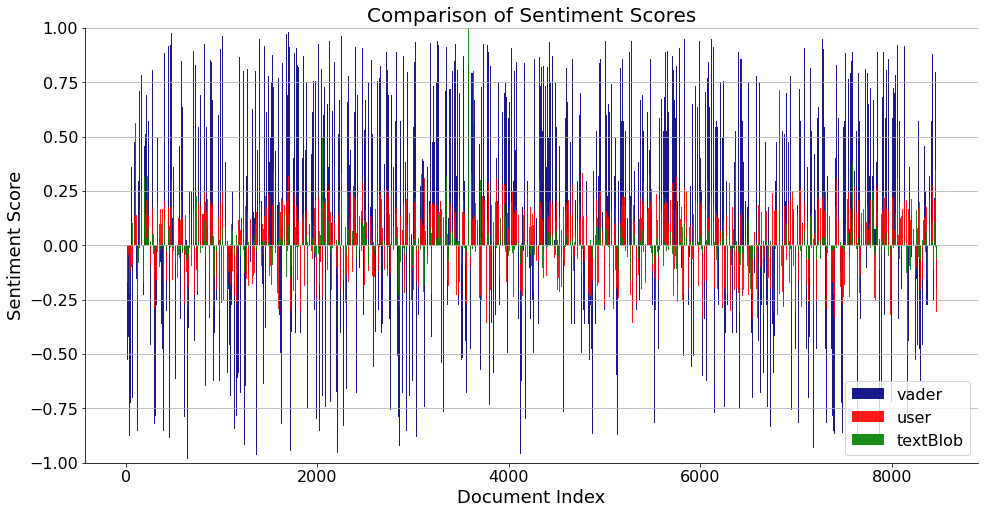

In [47]:
# Setting up seaborn graph settings
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams['font.size'] = '16'

fig = plt.figure()
ax = fig.add_subplot(111)

ax.bar(scores.keys(), vader,  
        color = "navy",
        alpha = 0.9,
        label = "vader")

ax.bar(scores.keys(), scores.values(),  
        color = "red",
        alpha = 0.9,
        label = "user")

ax.bar(scores.keys(), polar,  
        color = "green",
        alpha = 0.9,
        label = "textBlob")

ax.legend(loc='lower right')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title("Comparison of Sentiment Scores", fontsize =20)
plt.xlabel("Document Index", fontsize = 18)
plt.ylabel("Sentiment Score", fontsize = 18)
plt.ylim(-1, 1)

plt.grid(axis = 'y')

plt.show()


### 3.4. Combine All Scores to Get the Final Aggregate Score

We now combine all three scores into a single aggregated score based on weighted average.
We will put the most emphasis on our lexicon dictionary based score and lesser emphasis on scores from sentiment analysis algorithms

In [44]:
agg_labels = []
weight = [0.1, 0.05, 0.85]
for i in range(len(polar)):
#     value = np.average([polar[i], vader[i], scores[i]], weights = weight) ## Get the weighted average
    value = np.sum([weight[0]*polar[i], weight[1]*vader[i], weight[2]*scores[i]])
    agg_labels.append(value)

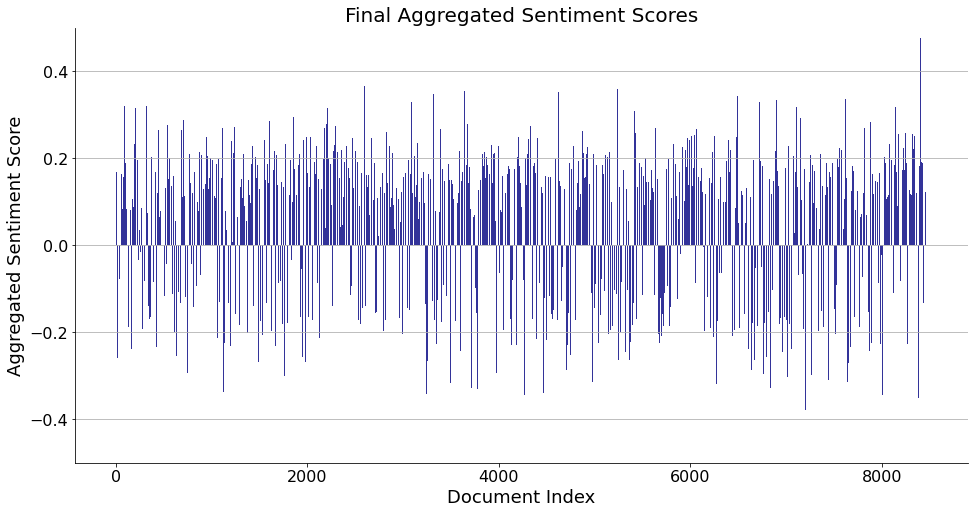

In [48]:
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams['font.size'] = '16'

fig = plt.figure()
ax = fig.add_subplot(111)

ax.bar(scores.keys(), agg_labels,  
        color = "navy",
        alpha = 0.8,
        label = "aggregate")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.grid(axis = 'y')

plt.title("Final Aggregated Sentiment Scores", fontsize =20)
plt.xlabel("Document Index", fontsize = 18)
plt.ylabel("Aggregated Sentiment Score", fontsize = 18)
plt.ylim(-0.5, 0.5)

plt.show()

In [49]:
agg_labels

[0.07143900641025641,
 0.18000000000000002,
 0.14515246031746032,
 0.28758588362068965,
 0.3012816326530612,
 0.12806590673697898,
 0.11590909090909089,
 0.1432286776859504,
 0.10580190476190474,
 0.18193521885521882,
 0.16794756410256412,
 -0.14072592592592592,
 -0.23752736527532822,
 0.24755752383979657,
 0.06173684210526315,
 -0.08875000000000001,
 -0.04461804347826086,
 0.231255,
 0.11067608695652172,
 -0.16800166666666666,
 -0.2581848387096774,
 0.08124999999999999,
 0.2592117541443139,
 0.2632423345701917,
 -0.22719666666666666,
 0.1860775,
 0.120095,
 0.14505960840746554,
 0.3656845414462081,
 -0.060609883720930235,
 0.3838153564049587,
 0.11957924715909089,
 -0.10297114226682408,
 0.14401061847243665,
 0.12859026313289634,
 0.16958635501355013,
 0.3202830864197531,
 -0.08448518518518518,
 -0.1392135714285714,
 0.222615,
 -0.2337838888888889,
 -0.077655,
 0.20943785714285715,
 0.17047723852040816,
 0.11565735767991406,
 -0.1445820041322314,
 0.16711994719926537,
 -0.176686666666

In [50]:
agg_labels[8424]

0.18870116379310345

In [51]:
class_list = []

for i in agg_labels:
    if i >= 0.1:
        class_list.append(1)
    elif i <= -0.1:
        class_list.append(-1)
    else:
        class_list.append(0)

In [52]:
df["class"] = class_list ## Create a new df column called class and add the values
df["score"] = agg_labels

In [53]:
df

date                                           original  \
0     1990-01-01  lead nicholas f brady a diffident modest well ...   
1     1990-01-01  lead in the worlds stock markets 1989 was a ye...   
2     1990-01-01  lead at a time when bankers and economists spe...   
3     1990-01-02  lead for years wall street has been a beacon o...   
4     1990-01-02  lead wall street outlook for many people inves...   
...          ...                                                ...   
8469  1999-12-29  market place column on whether commodity price...   
8470  1999-12-30  nasdaq ends above 4000 and is up 84 % for the ...   
8471  1999-12-30  dow jones industrial average nasdaq composite ...   
8472  1999-12-30  conference board reports index of leading econ...   
8473  1999-12-30  nasdaq composite index closes above 4000 point...   

                                                  texts  \
0     [nicholas, f, brady, diffident, modest, bear, ...   
1              [world, stock, market, year, unexpected]   
2     [time, banker, economist, speak, global, finan...   
3     [year, wall, street, beacon, wealth, glamour, ...   
4     [wall, street, outlook, people, invest, like, ...   
...                                                 ...   
8469  [market, place, column, commodity, price, rema...   
8470  [nasdaq, end, year, nasdaq, composite, index, ...   
8471  [dow, jones, industrial, average, nasdaq, comp...   
8472  [conference, board, report, index, lead, econo...   
8473  [nasdaq, composite, index, close, point, time,...   

                                                 shorts  class     score  
0     nicholas f brady diffident modest bear wall st...      0  0.071439  
1                    world stock market year unexpected      1  0.180000  
2     time banker economist speak global financial v...      1  0.145152  
3     year wall street beacon wealth glamour talente...      1  0.287586  
4     wall street outlook people invest like have mi...      1  0.301282  
...                                                 ...    ...       ...  
8469  market place column commodity price remain str...      1  0.142308  
8470  nasdaq end year nasdaq composite index way goo...      1  0.236139  
8471  dow jones industrial average nasdaq composite ...      1  0.194336  
8472  conference board report index lead economic in...      1  0.251034  
8473  nasdaq composite index close point time month ...      1  0.214571  

[8474 rows x 6 columns]

### Manually Check the Labelling by Reading Samples from Each Label (Class)

In [54]:
pd.options.display.max_colwidth = 1000 ## Increase the length of strings that can be viewed.

In [55]:
df["class"].value_counts() ## Get the count of each class

 1    4581
-1    2468
 0    1425
Name: class, dtype: int64

In [56]:
print(df[["original", "score"]][df["class"] == 0].sample(10)) ## Manually check their sentiment and verify correct labelling

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              original  \
3363                                                                                                                                                                      in seesaw trading and with heavy volume the stock market closed mixed yesterday as traders persuaded themselves that another rate increase by the federal reserve board was imminent traders had some basis for beli

In [57]:
## Positive Labels
print(df[["original", "score"]][df["class"] == 1].sample(10))

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  original  \
5330                                                                                                                                                                                                                                     dow ekes out a gain but stocks generally fall broad stock indexes dropped from their record levels pulled down by a slump in semiconductor stocks

In [58]:
## Negative labels
print(df[["original", "score"]][df["class"] == -1].sample(10))

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      original  \
6928  senior economic officials in china hold series of private meetings then emerge with public view of financial crisis engulfing other asian countries they urge chinese bankers to try to avert kind of panic that sent curencies and stock markets tumbling elsewhere chinas currency is not freely exchangeable to hard currencies and its stock

In [59]:
df.iloc[6886]

date                                                                                                                                                                                                                                                                                                                                                    1997-12-31
original    dow jones industrial average soars 12356 points or 159 percent to close at 791597 putting blue - chip index up 2276 percent to date in 1997 standard & poors 500 - stock index gains 1749 points or 183 percent to close at 97084 putting that stock barometer up 31 percent so far this year nasdaq composite index rises 179 percent to 156503 table
texts                                                                                                  [dow, jones, industrial, average, soar, point, percent, close, put, blue, chip, index, percent, date, standard, poor, stock, index, gain, point, percent, close, put, stock, barometer, per

## Copy the df and clean up the dataframe

In [60]:
df_copy = df.copy()

In [61]:
df_copy = df_copy.drop(["score", "texts"], axis = 1)

In [62]:
df_copy

date  \
0     1990-01-01   
1     1990-01-01   
2     1990-01-01   
3     1990-01-02   
4     1990-01-02   
...          ...   
8469  1999-12-29   
8470  1999-12-30   
8471  1999-12-30   
8472  1999-12-30   
8473  1999-12-30   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              original  \
0                                                                                                                                                                                                                                                                                                                                                                      lead nicholas f brady a diffident modest well - born wall streeter of whom not much was expected when president reagan made him treasury secretary in november 1988 tackled some of the most difficult problems of the american and world economy in 1989 and against heavy odds actually achieved some success   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   lead in the worlds stock markets 1989 was a year of the unexpected   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                      lead at a time when bankers and economists speak of a global financial village with the worlds centers of finance closely linked and interdependent the tokyo stock market is increasingly going its own stable and buoyant way   
3                                                                                                                                                                                                                                                                                                                                                                                                              lead for years wall street has been a beacon of wealth and glamour for talented young people willing to work punishing hours for mind - boggling pay today as wall street shrinks back to life - size proportions the game has shifted to making a living not a killing   
4                                                                                                                                                                                                                                                                                             lead wall street outlook for many people investing in 1989 was like having a miserable time at what should have been a great party whether 1990 is any bett

In [90]:
df_copy.to_pickle("df_copy.pkl") 


### Download 2000s Data from the API

In [69]:
dict_0009 = get_data(2000, 2009)

Loading…:   0%|                                          | 0/10 [00:00<?, ?it/s]

Gathering Data for Year: 2000, Month: 1



Loading…: 100%|█████████████████████████| 8502/8502 [00:00<00:00, 593462.47it/s]


Gathering Data for Year: 2000, Month: 2



Loading…: 100%|█████████████████████████| 7953/7953 [00:00<00:00, 581188.25it/s]


Gathering Data for Year: 2000, Month: 3



Loading…: 100%|█████████████████████████| 8482/8482 [00:00<00:00, 599045.03it/s]


Gathering Data for Year: 2000, Month: 4



Loading…: 100%|█████████████████████████| 8231/8231 [00:00<00:00, 509313.65it/s]


Gathering Data for Year: 2000, Month: 5



Loading…: 100%|█████████████████████████| 8331/8331 [00:00<00:00, 574999.94it/s]


Gathering Data for Year: 2000, Month: 6



Loading…: 100%|█████████████████████████| 8193/8193 [00:00<00:00, 555565.25it/s]


Gathering Data for Year: 2000, Month: 7



Loading…: 100%|█████████████████████████| 8215/8215 [00:00<00:00, 548691.93it/s]


Gathering Data for Year: 2000, Month: 8



Loading…: 100%|█████████████████████████| 8131/8131 [00:00<00:00, 599945.22it/s]


Gathering Data for Year: 2000, Month: 9



Loading…: 100%|█████████████████████████| 9736/9736 [00:00<00:00, 595950.84it/s]


Gathering Data for Year: 2000, Month: 10



Loading…: 100%|█████████████████████████| 9966/9966 [00:00<00:00, 598662.81it/s]


Gathering Data for Year: 2000, Month: 11



Loading…: 100%|█████████████████████████| 8635/8635 [00:00<00:00, 585821.28it/s]


Gathering Data for Year: 2000, Month: 12



Loading…:  10%|███                            | 1/10 [08:15<1:14:23, 495.96s/it]

Gathering Data for Year: 2001, Month: 1



Loading…: 100%|█████████████████████████| 9180/9180 [00:00<00:00, 598394.76it/s]


Gathering Data for Year: 2001, Month: 2



Loading…: 100%|█████████████████████████| 8230/8230 [00:00<00:00, 518881.67it/s]


Gathering Data for Year: 2001, Month: 3



Loading…: 100%|█████████████████████████| 8978/8978 [00:00<00:00, 586065.42it/s]


Gathering Data for Year: 2001, Month: 4



Loading…: 100%|█████████████████████████| 8788/8788 [00:00<00:00, 571572.13it/s]


Gathering Data for Year: 2001, Month: 5



Loading…: 100%|█████████████████████████| 9649/9649 [00:00<00:00, 587027.35it/s]


Gathering Data for Year: 2001, Month: 6



Loading…: 100%|█████████████████████████| 9215/9215 [00:00<00:00, 580433.88it/s]


Gathering Data for Year: 2001, Month: 7



Loading…: 100%|█████████████████████████| 9058/9058 [00:00<00:00, 604054.47it/s]


Gathering Data for Year: 2001, Month: 8



Loading…: 100%|█████████████████████████| 9214/9214 [00:00<00:00, 558497.00it/s]


Gathering Data for Year: 2001, Month: 9



Loading…: 100%|█████████████████████████| 9482/9482 [00:00<00:00, 612455.19it/s]


Gathering Data for Year: 2001, Month: 10



Loading…: 100%|███████████████████████| 10168/10168 [00:00<00:00, 459258.72it/s]


Gathering Data for Year: 2001, Month: 11



Loading…: 100%|█████████████████████████| 9667/9667 [00:00<00:00, 560009.07it/s]


Gathering Data for Year: 2001, Month: 12



Loading…:  20%|██████▏                        | 2/10 [18:39<1:16:06, 570.76s/it]

Gathering Data for Year: 2002, Month: 1



Loading…: 100%|█████████████████████████| 9147/9147 [00:00<00:00, 603484.16it/s]


Gathering Data for Year: 2002, Month: 2



Loading…: 100%|█████████████████████████| 8535/8535 [00:00<00:00, 590371.96it/s]


Gathering Data for Year: 2002, Month: 3



Loading…: 100%|█████████████████████████| 8902/8902 [00:00<00:00, 580688.57it/s]


Gathering Data for Year: 2002, Month: 4



Loading…: 100%|███████████████████████| 10616/10616 [00:00<00:00, 588627.55it/s]


Gathering Data for Year: 2002, Month: 5



Loading…: 100%|█████████████████████████| 9260/9260 [00:00<00:00, 599889.64it/s]


Gathering Data for Year: 2002, Month: 6



Loading…: 100%|█████████████████████████| 9268/9268 [00:00<00:00, 614191.74it/s]


Gathering Data for Year: 2002, Month: 7



Loading…: 100%|█████████████████████████| 8580/8580 [00:00<00:00, 582212.36it/s]


Gathering Data for Year: 2002, Month: 8



Loading…: 100%|█████████████████████████| 8487/8487 [00:00<00:00, 591342.73it/s]


Gathering Data for Year: 2002, Month: 9



Loading…: 100%|█████████████████████████| 9272/9272 [00:00<00:00, 596072.94it/s]


Gathering Data for Year: 2002, Month: 10



Loading…: 100%|█████████████████████████| 9713/9713 [00:00<00:00, 579077.71it/s]


Gathering Data for Year: 2002, Month: 11



Loading…: 100%|█████████████████████████| 9115/9115 [00:00<00:00, 591766.60it/s]


Gathering Data for Year: 2002, Month: 12



Loading…:  30%|█████████▎                     | 3/10 [29:00<1:09:15, 593.66s/it]

Gathering Data for Year: 2003, Month: 1



Loading…: 100%|█████████████████████████| 9213/9213 [00:00<00:00, 594814.48it/s]


Gathering Data for Year: 2003, Month: 2



Loading…: 100%|█████████████████████████| 8603/8603 [00:00<00:00, 594418.77it/s]


Gathering Data for Year: 2003, Month: 3



Loading…: 100%|█████████████████████████| 9766/9766 [00:00<00:00, 582767.65it/s]


Gathering Data for Year: 2003, Month: 4



Loading…: 100%|█████████████████████████| 9351/9351 [00:00<00:00, 589079.85it/s]


Gathering Data for Year: 2003, Month: 5



Loading…: 100%|█████████████████████████| 9157/9157 [00:00<00:00, 587850.95it/s]


Gathering Data for Year: 2003, Month: 6



Loading…: 100%|█████████████████████████| 9173/9173 [00:00<00:00, 589835.05it/s]


Gathering Data for Year: 2003, Month: 7



Loading…: 100%|█████████████████████████| 8568/8568 [00:00<00:00, 582651.78it/s]


Gathering Data for Year: 2003, Month: 8



Loading…: 100%|█████████████████████████| 8701/8701 [00:00<00:00, 572851.32it/s]


Gathering Data for Year: 2003, Month: 9



Loading…: 100%|█████████████████████████| 8555/8555 [00:00<00:00, 604516.24it/s]


Gathering Data for Year: 2003, Month: 10



Loading…: 100%|█████████████████████████| 9204/9204 [00:00<00:00, 573957.39it/s]


Gathering Data for Year: 2003, Month: 11



Loading…: 100%|█████████████████████████| 9034/9034 [00:00<00:00, 607895.50it/s]


Gathering Data for Year: 2003, Month: 12



Loading…:  40%|█████████████▏                   | 4/10 [38:47<59:08, 591.36s/it]

Gathering Data for Year: 2004, Month: 1



Loading…: 100%|█████████████████████████| 8810/8810 [00:00<00:00, 596275.97it/s]


Gathering Data for Year: 2004, Month: 2



Loading…: 100%|█████████████████████████| 8750/8750 [00:00<00:00, 576339.71it/s]


Gathering Data for Year: 2004, Month: 3



Loading…: 100%|█████████████████████████| 8986/8986 [00:00<00:00, 595531.79it/s]


Gathering Data for Year: 2004, Month: 4



Loading…: 100%|█████████████████████████| 8519/8519 [00:00<00:00, 596395.98it/s]


Gathering Data for Year: 2004, Month: 5



Loading…: 100%|█████████████████████████| 8899/8899 [00:00<00:00, 597287.79it/s]


Gathering Data for Year: 2004, Month: 6



Loading…: 100%|█████████████████████████| 8436/8436 [00:00<00:00, 584700.46it/s]


Gathering Data for Year: 2004, Month: 7



Loading…: 100%|█████████████████████████| 8696/8696 [00:00<00:00, 602004.85it/s]


Gathering Data for Year: 2004, Month: 8



Loading…: 100%|█████████████████████████| 8682/8682 [00:00<00:00, 553805.81it/s]


Gathering Data for Year: 2004, Month: 9



Loading…: 100%|█████████████████████████| 9131/9131 [00:00<00:00, 472887.22it/s]


Gathering Data for Year: 2004, Month: 10



Loading…: 100%|███████████████████████| 10876/10876 [00:00<00:00, 464661.88it/s]


Gathering Data for Year: 2004, Month: 11



Loading…: 100%|█████████████████████████| 8997/8997 [00:00<00:00, 586047.01it/s]


Gathering Data for Year: 2004, Month: 12



Loading…:  50%|████████████████▌                | 5/10 [49:21<50:33, 606.74s/it]

Gathering Data for Year: 2005, Month: 1



Loading…: 100%|███████████████████████| 10567/10567 [00:00<00:00, 622130.66it/s]


Gathering Data for Year: 2005, Month: 2



Loading…: 100%|█████████████████████████| 9311/9311 [00:00<00:00, 582630.87it/s]


Gathering Data for Year: 2005, Month: 3



Loading…: 100%|███████████████████████| 10262/10262 [00:00<00:00, 555043.36it/s]


Gathering Data for Year: 2005, Month: 4



Loading…: 100%|███████████████████████| 10180/10180 [00:00<00:00, 581012.32it/s]


Gathering Data for Year: 2005, Month: 5



Loading…: 100%|███████████████████████| 10526/10526 [00:00<00:00, 608476.70it/s]


Gathering Data for Year: 2005, Month: 6



Loading…: 100%|███████████████████████| 10032/10032 [00:00<00:00, 509835.79it/s]


Gathering Data for Year: 2005, Month: 7



Loading…: 100%|███████████████████████| 10113/10113 [00:00<00:00, 589608.10it/s]


Gathering Data for Year: 2005, Month: 8



Loading…: 100%|█████████████████████████| 9698/9698 [00:00<00:00, 593477.58it/s]


Gathering Data for Year: 2005, Month: 9



Loading…: 100%|███████████████████████| 10256/10256 [00:00<00:00, 590103.60it/s]


Gathering Data for Year: 2005, Month: 10



Loading…: 100%|███████████████████████| 10464/10464 [00:00<00:00, 608085.75it/s]


Gathering Data for Year: 2005, Month: 11



Loading…: 100%|███████████████████████| 10130/10130 [00:00<00:00, 610639.54it/s]


Gathering Data for Year: 2005, Month: 12



Loading…:  60%|███████████████████▊             | 6/10 [59:05<39:55, 598.78s/it]

Gathering Data for Year: 2006, Month: 1



Loading…: 100%|███████████████████████| 10671/10671 [00:00<00:00, 602541.94it/s]


Gathering Data for Year: 2006, Month: 2



Loading…: 100%|███████████████████████| 10030/10030 [00:00<00:00, 632842.97it/s]


Gathering Data for Year: 2006, Month: 3



Loading…: 100%|███████████████████████| 12357/12357 [00:00<00:00, 570477.42it/s]


Gathering Data for Year: 2006, Month: 4



Loading…: 100%|███████████████████████| 12130/12130 [00:00<00:00, 582002.44it/s]


Gathering Data for Year: 2006, Month: 5



Loading…: 100%|███████████████████████| 15001/15001 [00:00<00:00, 647125.87it/s]


Gathering Data for Year: 2006, Month: 6



Loading…: 100%|███████████████████████| 15109/15109 [00:00<00:00, 650406.83it/s]


Gathering Data for Year: 2006, Month: 7



Loading…: 100%|███████████████████████| 14294/14294 [00:00<00:00, 628336.77it/s]


Gathering Data for Year: 2006, Month: 8



Loading…: 100%|███████████████████████| 14075/14075 [00:00<00:00, 590472.29it/s]


Gathering Data for Year: 2006, Month: 9



Loading…: 100%|███████████████████████| 15036/15036 [00:00<00:00, 637309.06it/s]


Gathering Data for Year: 2006, Month: 10



Loading…: 100%|███████████████████████| 14845/14845 [00:00<00:00, 646641.29it/s]


Gathering Data for Year: 2006, Month: 11



Loading…: 100%|███████████████████████| 15028/15028 [00:00<00:00, 607192.06it/s]


Gathering Data for Year: 2006, Month: 12



Loading…:  70%|█████████████████████▋         | 7/10 [1:11:21<32:11, 643.86s/it]

Gathering Data for Year: 2007, Month: 1



Loading…: 100%|█████████████████████████| 7905/7905 [00:00<00:00, 693175.55it/s]


Gathering Data for Year: 2007, Month: 2



Loading…: 100%|█████████████████████████| 7186/7186 [00:00<00:00, 703899.40it/s]


Gathering Data for Year: 2007, Month: 3



Loading…: 100%|█████████████████████████| 8428/8428 [00:00<00:00, 709418.09it/s]


Gathering Data for Year: 2007, Month: 4



Loading…: 100%|█████████████████████████| 8068/8068 [00:00<00:00, 699252.90it/s]


Gathering Data for Year: 2007, Month: 5



Loading…: 100%|█████████████████████████| 8254/8254 [00:00<00:00, 729605.59it/s]


Gathering Data for Year: 2007, Month: 6



Loading…: 100%|█████████████████████████| 8230/8230 [00:00<00:00, 710518.53it/s]


Gathering Data for Year: 2007, Month: 7



Loading…: 100%|█████████████████████████| 8558/8558 [00:00<00:00, 719826.21it/s]


Gathering Data for Year: 2007, Month: 8



Loading…: 100%|█████████████████████████| 8061/8061 [00:00<00:00, 725620.44it/s]


Gathering Data for Year: 2007, Month: 9



Loading…: 100%|█████████████████████████| 9063/9063 [00:00<00:00, 700377.29it/s]


Gathering Data for Year: 2007, Month: 10



Loading…: 100%|█████████████████████████| 9561/9561 [00:00<00:00, 681619.85it/s]


Gathering Data for Year: 2007, Month: 11



Loading…: 100%|█████████████████████████| 8687/8687 [00:00<00:00, 697298.12it/s]


Gathering Data for Year: 2007, Month: 12



Loading…:  80%|████████████████████████▊      | 8/10 [1:18:27<19:08, 574.48s/it]

Gathering Data for Year: 2008, Month: 1



Loading…: 100%|█████████████████████████| 9857/9857 [00:00<00:00, 733465.58it/s]


Gathering Data for Year: 2008, Month: 2



Loading…: 100%|█████████████████████████| 9083/9083 [00:00<00:00, 748803.26it/s]


Gathering Data for Year: 2008, Month: 3



Loading…: 100%|█████████████████████████| 9561/9561 [00:00<00:00, 766836.99it/s]


Gathering Data for Year: 2008, Month: 4



Loading…: 100%|█████████████████████████| 9449/9449 [00:00<00:00, 748436.89it/s]


Gathering Data for Year: 2008, Month: 5



Loading…: 100%|█████████████████████████| 9468/9468 [00:00<00:00, 733852.06it/s]


Gathering Data for Year: 2008, Month: 6



Loading…: 100%|█████████████████████████| 9368/9368 [00:00<00:00, 691630.84it/s]


Gathering Data for Year: 2008, Month: 7



Loading…: 100%|█████████████████████████| 9323/9323 [00:00<00:00, 690691.45it/s]


Gathering Data for Year: 2008, Month: 8



Loading…: 100%|███████████████████████| 10281/10281 [00:00<00:00, 716699.18it/s]


Gathering Data for Year: 2008, Month: 9



Loading…: 100%|███████████████████████| 10769/10769 [00:00<00:00, 784842.31it/s]


Gathering Data for Year: 2008, Month: 10



Loading…: 100%|███████████████████████| 11545/11545 [00:00<00:00, 778083.36it/s]


Gathering Data for Year: 2008, Month: 11



Loading…: 100%|███████████████████████| 10054/10054 [00:00<00:00, 719223.84it/s]


Gathering Data for Year: 2008, Month: 12



Loading…:  90%|███████████████████████████▉   | 9/10 [1:25:09<08:40, 520.46s/it]

Gathering Data for Year: 2009, Month: 1



Loading…: 100%|███████████████████████| 10691/10691 [00:00<00:00, 777482.52it/s]


Gathering Data for Year: 2009, Month: 2



Loading…: 100%|███████████████████████| 10072/10072 [00:00<00:00, 716709.87it/s]


Gathering Data for Year: 2009, Month: 3



Loading…: 100%|███████████████████████| 11334/11334 [00:00<00:00, 785652.17it/s]


Gathering Data for Year: 2009, Month: 4



Loading…: 100%|███████████████████████| 11042/11042 [00:00<00:00, 760934.29it/s]


Gathering Data for Year: 2009, Month: 5



Loading…: 100%|███████████████████████| 13632/13632 [00:00<00:00, 679357.34it/s]


Gathering Data for Year: 2009, Month: 6



Loading…: 100%|███████████████████████| 14413/14413 [00:00<00:00, 690112.83it/s]


Gathering Data for Year: 2009, Month: 7



Loading…: 100%|███████████████████████| 13687/13687 [00:00<00:00, 711465.49it/s]


Gathering Data for Year: 2009, Month: 8



Loading…: 100%|███████████████████████| 13140/13140 [00:00<00:00, 720358.06it/s]


Gathering Data for Year: 2009, Month: 9



Loading…: 100%|███████████████████████| 14558/14558 [00:00<00:00, 711157.31it/s]


Gathering Data for Year: 2009, Month: 10



Loading…: 100%|███████████████████████| 15463/15463 [00:00<00:00, 666685.75it/s]


Gathering Data for Year: 2009, Month: 11



Loading…: 100%|█████████████████████████| 9432/9432 [00:00<00:00, 781460.87it/s]


Gathering Data for Year: 2009, Month: 12



Loading…: 100%|██████████████████████████████| 10/10 [1:33:16<00:00, 559.63s/it]


In [70]:
df_0009 = create_df(dict_0009)

In [71]:
## Drop articles that are longer than 1000 characters for simplicity
long = []
for index in range(len(df_0009)):
    if len(df_0009.original[index]) > 1000:
        long.append(index)
        

df_0009 = df_0009.drop(labels = long, axis = 0)
df_0009 = df_0009.reset_index(drop=True)

In [72]:
df_0009

date  \
0     2000-01-01   
1     2000-01-01   
2     2000-01-02   
3     2000-01-02   
4     2000-01-02   
...          ...   
8528  2009-12-24   
8529  2009-12-24   
8530  2009-12-26   
8531  2009-12-29   
8532  2009-12-31   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   original  \
0                                                                                                                                                    russian stocks leap after yeltsin steps aside boris n yeltsins surprise resignation drove russian stock prices up sharply reflecting optimism that the acting president vladimir v putin will revive stalled economic reforms the russian trading system stock index rose 18 percent its biggest one - day increase since july 14 1998   
1                                                                                                                                                                                                               floyd norris column offers review of stock market of last 100 years says american public fell in and out of love with stock market at least twice during that time before ending century completely enraptured with possibility of wealth via wall street graphs and charts   
2                                                                                                                                                                                                                                           clifford krauss   article discusses volatility in latin american stock markets in 1999 cites stock recommendations offered by james upton latin american equity strategist at credit suisse first boston graph on latin american stocks in 1999   
3     jesse l jackson jr congressman and son of rev jessie l jackson is promoting his cause to get african americans into wall street and compelete passage from sharecropper to shareholder toward this end he and his father have written book its about the money which is a how - to manual on investing and personal financial management aimed primarily at minority americans who jacksons says have largely missed out on one of greatest bull markets in history photo of jacksons   
4                                                                                                                               lipper inc research firm says net new investments in index funds that track standard & poors 500 - stock index fell considerably in november to $ 600 million from $ 325 billion in october says this is slowest pace of cash inflows into index funds since summer of 1998 says part of money is likely going into individual growth and technology stocks   
...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     ...   
8528                                                                                                                                                                                                                                                                                                                                                      shares on wall street rose closing at their highest levels for the year 

In [73]:
for i in df_0009.index:
    if df_0009.texts[i][0] == "lead":
        df_0009.texts[i].pop(0)
    else:
        continue

df_0009["shorts"] = ""

for i in df_0009.index:
    df_0009.shorts[i] = " ".join([word for word in df_0009.texts[i]])


In [74]:
labels = {}
for i in df_0009.index:

    for word in df_0009.texts[i]:            
        if word in positive_words:
            labels = create_dict(labels, i, "+")
    
        elif word in negative_words:
            labels = create_dict(labels, i, "-") 
    
        else:
            labels = create_dict(labels, i, "0")

scores = {}
for key, value in labels.items():
    plus = value.count("+")
    minus = value.count("-")
    neutral = value.count("0")
    total = len(value)
    pos_score = plus/total
    neg_score = minus/total
    neut_score = neutral/total
    
    r = np.array([pos_score, neg_score])

    score = max([pos_score, neg_score])
    if neg_score > pos_score:
        score = -score
        
    scores[key] = score 

In [75]:
polar = []
for text in df_0009.shorts:
    textBlob = TextBlob(text)
    polar.append(textBlob.polarity * textBlob.subjectivity)

In [76]:
vader= []

for text in df_0009.shorts:
    vader.append(get_vader_scores(text))

In [77]:
agg_labels = []
weight = [0.1, 0.05, 0.85]
for i in range(len(polar)):
#     value = np.average([polar[i], vader[i], scores[i]], weights = weight) ## Get the weighted average
    value = np.sum([weight[0]*polar[i], weight[1]*vader[i], weight[2]*scores[i]])
    agg_labels.append(value)

In [78]:
class_list = []

for i in agg_labels:
    if i >= 0.1:
        class_list.append(1)
    elif i <= -0.1:
        class_list.append(-1)
    else:
        class_list.append(0)

In [79]:
df_0009["class"] = class_list ## Create a new df column called class and add the values
df_0009["score"] = agg_labels

In [80]:
df_0009

date  \
0     2000-01-01   
1     2000-01-01   
2     2000-01-02   
3     2000-01-02   
4     2000-01-02   
...          ...   
8528  2009-12-24   
8529  2009-12-24   
8530  2009-12-26   
8531  2009-12-29   
8532  2009-12-31   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   original  \
0                                                                                                                                                    russian stocks leap after yeltsin steps aside boris n yeltsins surprise resignation drove russian stock prices up sharply reflecting optimism that the acting president vladimir v putin will revive stalled economic reforms the russian trading system stock index rose 18 percent its biggest one - day increase since july 14 1998   
1                                                                                                                                                                                                               floyd norris column offers review of stock market of last 100 years says american public fell in and out of love with stock market at least twice during that time before ending century completely enraptured with possibility of wealth via wall street graphs and charts   
2                                                                                                                                                                                                                                           clifford krauss   article discusses volatility in latin american stock markets in 1999 cites stock recommendations offered by james upton latin american equity strategist at credit suisse first boston graph on latin american stocks in 1999   
3     jesse l jackson jr congressman and son of rev jessie l jackson is promoting his cause to get african americans into wall street and compelete passage from sharecropper to shareholder toward this end he and his father have written book its about the money which is a how - to manual on investing and personal financial management aimed primarily at minority americans who jacksons says have largely missed out on one of greatest bull markets in history photo of jacksons   
4                                                                                                                               lipper inc research firm says net new investments in index funds that track standard & poors 500 - stock index fell considerably in november to $ 600 million from $ 325 billion in october says this is slowest pace of cash inflows into index funds since summer of 1998 says part of money is likely going into individual growth and technology stocks   
...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     ...   
8528                                                                                                                                                                                                                                                                                                                                                      shares on wall street rose closing at their highest levels for the year 

In [81]:
df_0009_copy = df_0009.copy()

df_0009_copy = df_0009_copy.drop(["score", "texts"], axis = 1)


In [82]:
df_0009_copy

date  \
0     2000-01-01   
1     2000-01-01   
2     2000-01-02   
3     2000-01-02   
4     2000-01-02   
...          ...   
8528  2009-12-24   
8529  2009-12-24   
8530  2009-12-26   
8531  2009-12-29   
8532  2009-12-31   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   original  \
0                                                                                                                                                    russian stocks leap after yeltsin steps aside boris n yeltsins surprise resignation drove russian stock prices up sharply reflecting optimism that the acting president vladimir v putin will revive stalled economic reforms the russian trading system stock index rose 18 percent its biggest one - day increase since july 14 1998   
1                                                                                                                                                                                                               floyd norris column offers review of stock market of last 100 years says american public fell in and out of love with stock market at least twice during that time before ending century completely enraptured with possibility of wealth via wall street graphs and charts   
2                                                                                                                                                                                                                                           clifford krauss   article discusses volatility in latin american stock markets in 1999 cites stock recommendations offered by james upton latin american equity strategist at credit suisse first boston graph on latin american stocks in 1999   
3     jesse l jackson jr congressman and son of rev jessie l jackson is promoting his cause to get african americans into wall street and compelete passage from sharecropper to shareholder toward this end he and his father have written book its about the money which is a how - to manual on investing and personal financial management aimed primarily at minority americans who jacksons says have largely missed out on one of greatest bull markets in history photo of jacksons   
4                                                                                                                               lipper inc research firm says net new investments in index funds that track standard & poors 500 - stock index fell considerably in november to $ 600 million from $ 325 billion in october says this is slowest pace of cash inflows into index funds since summer of 1998 says part of money is likely going into individual growth and technology stocks   
...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     ...   
8528                                                                                                                                                                                                                                                                                                                                                      shares on wall street rose closing at their highest levels for the year 

In [89]:
df_0009_copy.to_pickle("df_copy_0009.pkl") 


## Rest of the Project is Continued in Part 2

In [84]:
## The remaining code is for exporting the data as csv for capstone project

In [85]:
# df2 = df.groupby(['date']).sum()

In [86]:
# df2.value_counts()

In [87]:
# df2

In [88]:
# df2.to_csv('sentiment.csv', index=True)